In [1]:
import cv2
import json
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Replace with your actual image and JSON file paths
image_path = "sample_img.jpg"
json_path = "sample_img.json"

In [3]:
with open(json_path, 'r') as f:
  data = json.load(f)

# Print the data type of the top-level element
print(type(data))

# Check if it's a dictionary or list
if isinstance(data, dict):
  # Loop through key-value pairs
  for key, value in data.items():
    print(f"Key: {key}, Value type: {type(value)}")
elif isinstance(data, list):
  # Loop through elements in the list
  for item in data:
    print(f"Item type: {type(item)}")


<class 'dict'>
Key: asset, Value type: <class 'dict'>
Key: regions, Value type: <class 'list'>
Key: version, Value type: <class 'str'>


In [4]:
def visualize_bounding_boxes(image_path, json_path):
  """
  Visualizes bounding boxes from a JSON file on an image.

  Args:
    image_path: Path to the image file.
    json_path: Path to the JSON file containing segmentation labels (bounding boxes).
  """
  # Read the image
  image = cv2.imread(image_path)

  # Load segmentation data from JSON
  with open(json_path, 'r') as f:
    data = json.load(f)

  # Extract bounding box information
  for item in data['regions']:  # Assuming "regions" is the key containing bounding box data
    bounding_box = item['boundingBox']
    top = int(bounding_box['top'])
    left = int(bounding_box['left'])
    width = int(bounding_box['width'])
    height = int(bounding_box['height'])
    bottom = top + height
    right = left + width

    # Draw the bounding box
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)  # Green bounding box with thickness 2

  # Convert image from BGR to RGB for matplotlib
  rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Display the image with segmentation mask using matplotlib
  plt.imshow(rgb_image)
  plt.title("Image with Bounding Boxes")
  plt.show()


In [8]:

def visualize_segmentation(image_path, json_path):
  """
  Visualizes segmentation labels from a JSON file on an image.

  Args:
      image_path: Path to the image file.
      json_path: Path to the JSON file containing segmentation labels.
  """
  # Read the image
  image = cv2.imread(image_path)

  # Load segmentation data from JSON
  with open(json_path, 'r') as f:
    data = json.load(f)

  # Extract segmentation information (assuming polygon format)
  # Modify this part based on your specific JSON structure
  for segment in data['regions']:
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))  # Random color for each segment
    print(color)
    pts = segment['points']
    pts_array = np.array(pts)
    pts_array_values = np.array([[item['x'], item['y']] for item in pts_array]).astype(np.int32)
    cv2.fillPoly(image, [pts_array_values], color)  # Fill polygon with random color
    
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Display the image with segmentation mask using matplotlib
  plt.imshow(rgb_image)
  plt.title("Image with Segmentation")
  plt.show()
    




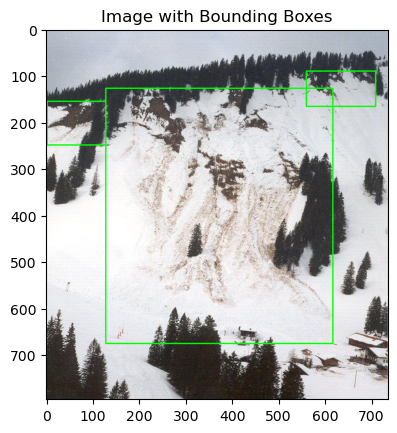

In [9]:
visualize_bounding_boxes(image_path, json_path)

(30, 210, 185)
(121, 32, 80)
(70, 111, 178)


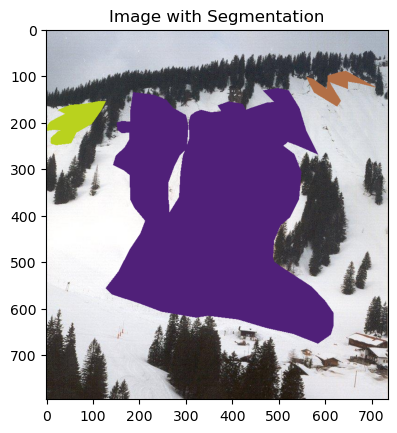

In [10]:
visualize_segmentation(image_path, json_path)